<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [47]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [48]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [49]:

df['ConvertedCompYearly'].isnull().sum()

np.int64(42002)

In [50]:
print(comp.head(15))
print(comp.mean())

AttributeError: 'function' object has no attribute 'head'

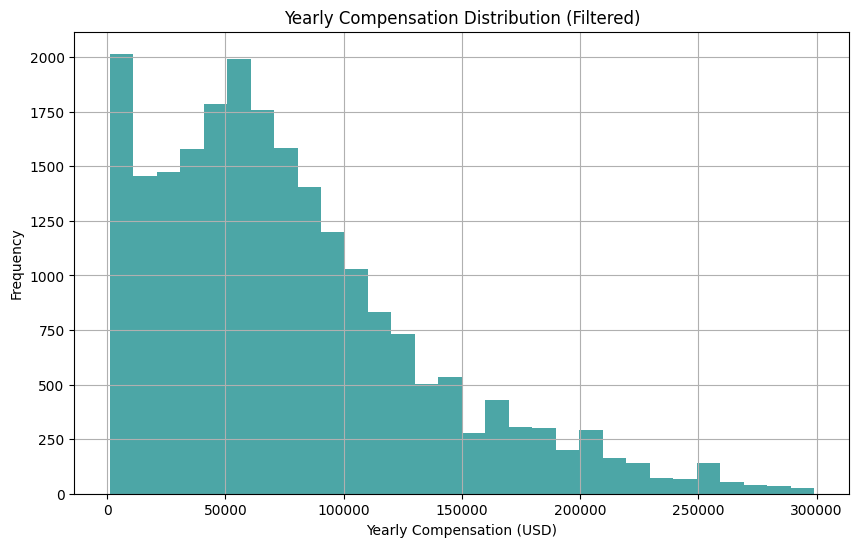

In [51]:
# Drop NaNs and filter extreme values
comp = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce').dropna()
comp = comp[(comp > 1000) & (comp < 300000)]  # adjust max as needed

# Plot
plt.figure(figsize=(10, 6))
comp.plot(kind='hist', bins=30, alpha=0.7, color='teal')
plt.title('Yearly Compensation Distribution (Filtered)')
plt.xlabel('Yearly Compensation (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [52]:
## Write your code here
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
comp = df['ConvertedCompYearly'].drop
comp.plot(kind = 'hist',  bins = 20, alpha = 0.5 ) 
plt.title('distribution of converted comp yearly') 

AttributeError: 'function' object has no attribute 'plot'

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [54]:
## Write your code here

# Ensure the column is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Calculate the mean (excluding NaNs)
mean_value = df['ConvertedCompYearly'].mean()

# Fill missing values with the mean
df['ConvertedCompYearly'].fillna(mean_value, inplace=True)

print(f"NaNs remaining: {df['ConvertedCompYearly'].isnull().sum()}")

full_time = df[df['Employment'] == 'Employed, full-time']
full_time = full_time.dropna()
print(full_time['ConvertedCompYearly'].median()) 

/tmp/ipykernel_1520/1686356152.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(mean_value, inplace=True)


NaNs remaining: 0
nan


In [34]:
# Ensure compensation column is numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Filter for full-time employees
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Calculate median compensation
median_full_time_comp = full_time_df['ConvertedCompYearly'].median()

print(f"Median compensation for full-time employed respondents: ${median_full_time_comp:,.2f}")


Median compensation for full-time employed respondents: $86,155.29


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



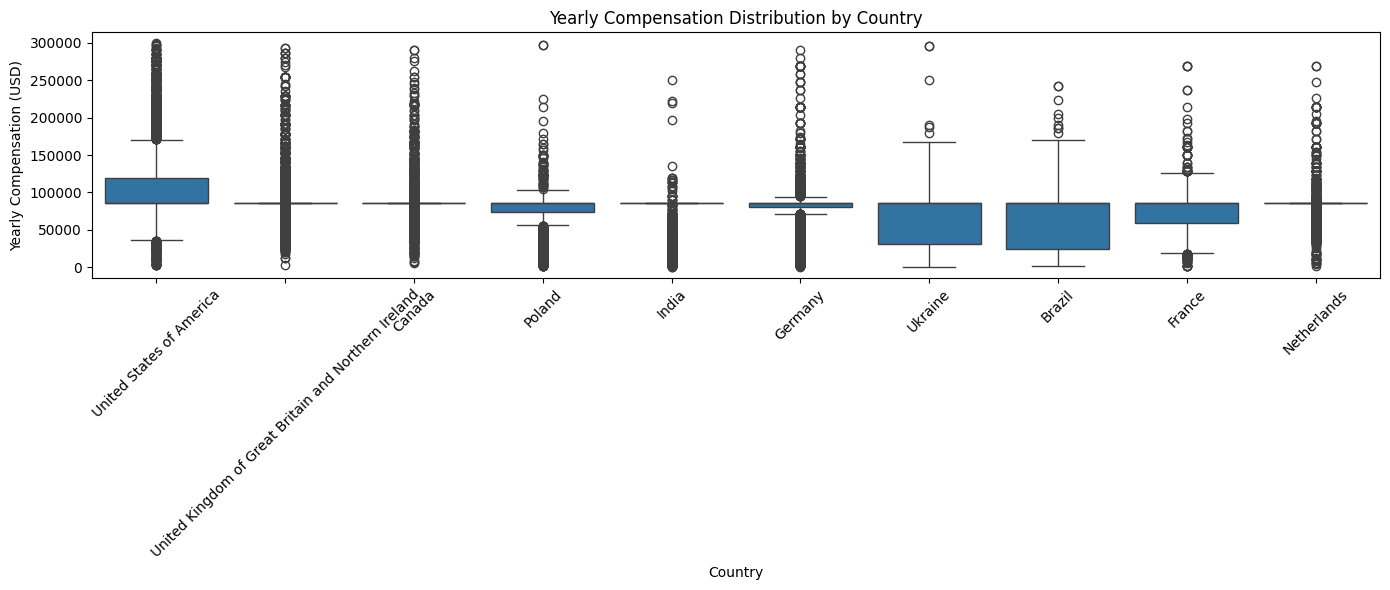

In [55]:
## Write your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert compensation to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Step 2: Drop missing values and optionally filter extreme outliers for visibility
filtered_df = df[['Country', 'ConvertedCompYearly']].dropna()
filtered_df = filtered_df[(filtered_df['ConvertedCompYearly'] > 1000) & 
                          (filtered_df['ConvertedCompYearly'] < 300000)]  # filter out extremes

# Step 3: Select top N countries with the most responses for readability
top_countries = filtered_df['Country'].value_counts().head(10).index
filtered_df = filtered_df[filtered_df['Country'].isin(top_countries)]

# Step 4: Plot box plot
plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_df, x='Country', y='ConvertedCompYearly')
plt.title('Yearly Compensation Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [56]:
## Write your code here
df.columns = df.columns.str.strip()  # remove hidden spaces
print(df.columns.tolist())  # use this to find the correct name if still unsure

# Step 2: Replace with the actual column name if different
column = 'ConvertedCompYearly'  # Replace with your actual compensation column name if different

# Step 3: Calculate IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Step 4: Define bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 5: Filter out outliers
df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Step 6: Compare sizes
print(f"Original size: {df.shape[0]} rows")
print(f"After outlier removal: {df_no_outliers.shape[0]} rows")


['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


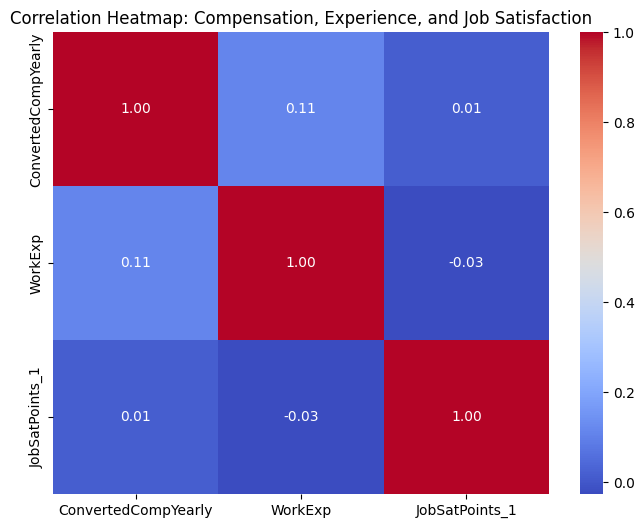

In [57]:
## Write your code here
import seaborn as sns
df_corr= df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()
df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].head()


correlation_matrix = df_corr.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Compensation, Experience, and Job Satisfaction')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


In [63]:
df['ConvertedCompYearly'].describe()

count    6.543700e+04
mean     8.615529e+04
std      1.117614e+05
min      1.000000e+00
25%      8.615529e+04
50%      8.615529e+04
75%      8.615529e+04
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [65]:
print(df['ConvertedCompYearly'].unique())


[ 86155.28726264   7322.          30074.         ...  15637.
   9711.         116844.        ]


0    86155.287263
1    86155.287263
2    86155.287263
3    86155.287263
4    86155.287263
5    86155.287263
6    86155.287263
7    86155.287263
8    86155.287263
9    86155.287263
Name: ConvertedCompYearly, dtype: float64

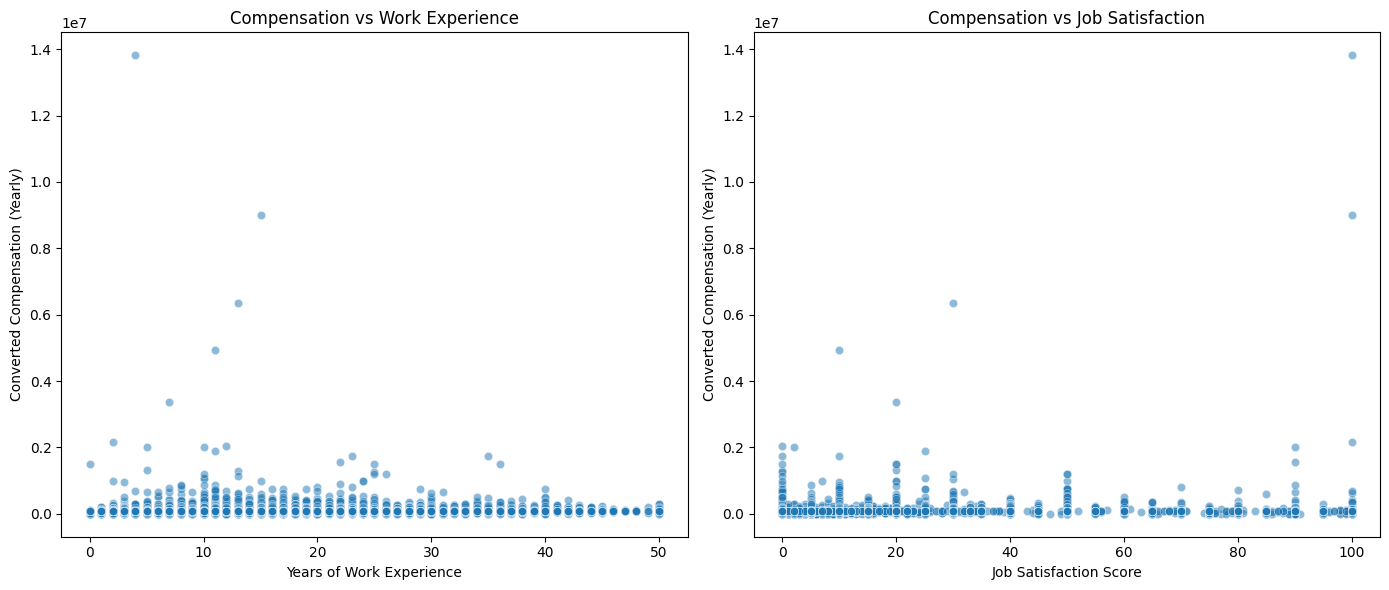

In [58]:
## Write your code here

plt.figure(figsize=(14, 6))

# Scatter Plot 1: Compensation vs Work Experience
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='WorkExp', y='ConvertedCompYearly', alpha=0.5)
plt.title('Compensation vs Work Experience')
plt.xlabel('Years of Work Experience')
plt.ylabel('Converted Compensation (Yearly)')

# Scatter Plot 2: Compensation vs Job Satisfaction
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='JobSatPoints_1', y='ConvertedCompYearly', alpha=0.5)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Converted Compensation (Yearly)')

plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
